<a href="https://colab.research.google.com/github/Beast-adarshyadav/parkinsons_spiral/blob/main/parkinsons_sspiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating: drawings/spiral/test

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [62]:
x  = '/content/spiral/training'
path = Path(x)
path.ls()

(#2) [Path('/content/spiral/training/parkinson'),Path('/content/spiral/training/healthy')]

In [75]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train = '/content/spiral/training', valid_pct=0.2, # Removed 'spiral/' from the beginning of the path as it is already included in the path variable.
                                  item_tfms=[Resize(224)], # Resize images when loading them
                                  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)], # Ensure all images are resized to 224x224
                                  size=224,bs=8,
                                  num_workers=4)


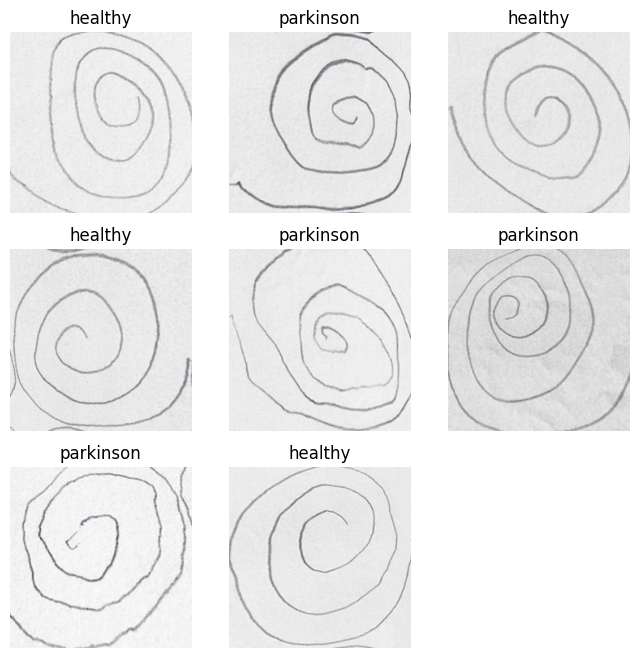

In [77]:
data.show_batch(nrows=3, figsize=(8,8))

In [78]:
data

In [80]:
print(data.vocab) # Use data.vocab to access classes
len(data.vocab) # Get the number of classes

['healthy', 'parkinson']


2

In [83]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50 # Changed module name to resnet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [84]:
#spiral
IMAGE_SIZE = [224, 224]

train_path = '/content/spiral/training'
valid_path = '/content/spiral/testing'

#wave
IMAGE_SIZE = [224, 224]

train_path = '/content/wave/testing'
valid_path = '/content/wave/training'


In [85]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [86]:
folders = glob('/content/spiral/training/*')
folders = glob('/content/wave/training/*')

In [87]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 21,870,754 (83.43 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [88]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [89]:
#spiral
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/spiral/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/spiral/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [92]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras # Added this line to import the keras module

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


history = model.fit(
        training_set,
        steps_per_epoch=training_set.n//training_set.batch_size,
        epochs=10,
        validation_data=test_set,
        validation_steps=test_set.n//test_set.batch_size,
        callbacks=early_stopping)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - accuracy: 0.5938 - loss: 3.8454 - val_accuracy: 0.5000 - val_loss: 12.3207
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7500 - loss: 1.7303 - val_accuracy: 0.5000 - val_loss: 15.8595
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 0.8542 - loss: 0.4281 - val_accuracy: 0.5000 - val_loss: 17.3630
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.8750 - loss: 0.8927 - val_accuracy: 0.5667 - val_loss: 16.7240
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.7937 - loss: 0.7783 - val_accuracy: 0.5000 - val_loss: 33.4594
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8750 - loss: 0.6085 - val_accuracy: 0.5000 - val_loss: 42.8425
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.6500 - loss: 1.7506 - val_accuracy: 0.5000 - val_loss: 18.5400
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.7812 - loss: 0.8775 - val_accuracy: 0.5667 - va

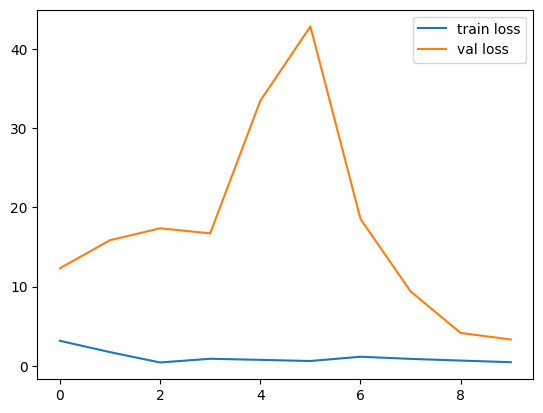

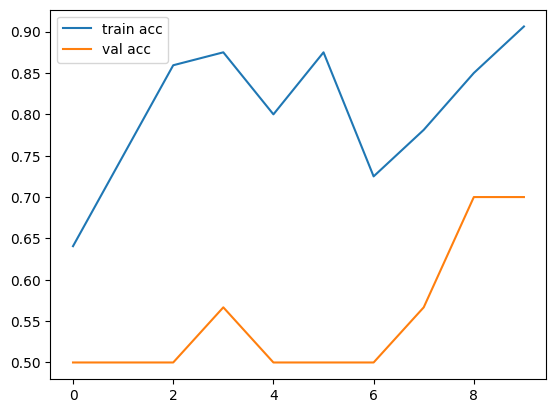

<Figure size 640x480 with 0 Axes>

In [93]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss') # Access metrics using history.history
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc') # Access metrics using history.history
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


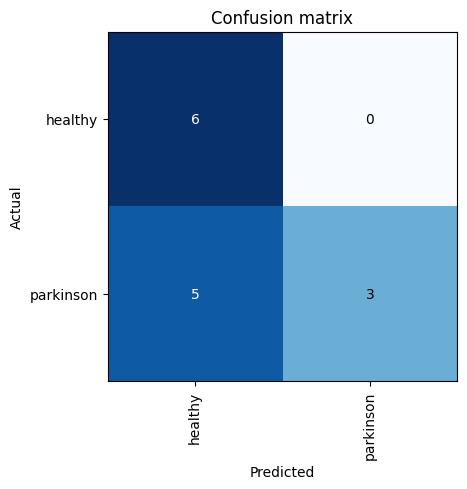

In [94]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

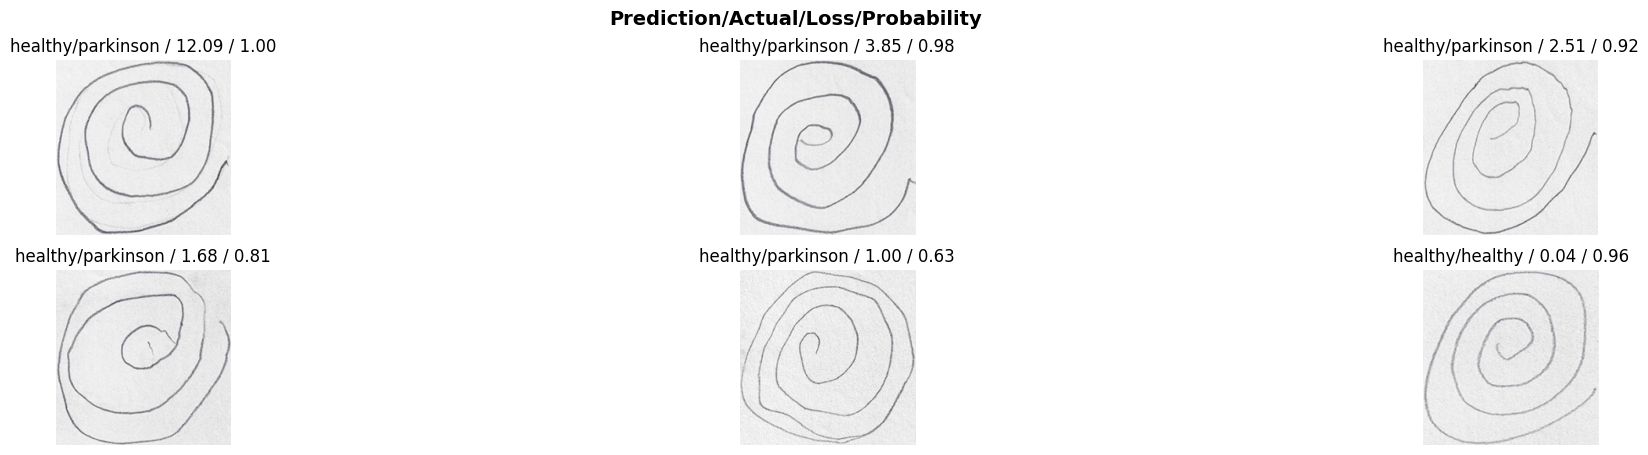

In [95]:
interp.plot_top_losses(6,figsize = (25,5))

In [101]:
from fastai.vision.all import * # Import the necessary modules from fastai.vision.all

img = PILImage.create('/content/V01HE01.png') # Use PILImage.create to open the image
print(learn.predict(img)[0])

healthy
